# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import json
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_data = requests.get(btc_url)
btc = btc_data.json()
btc_price = btc["data"]['1']['quotes']['USD']['price']

# Fetch current ETH price
# YOUR CODE HERE!]
eth_data = requests.get(eth_url)
eth = eth_data.json()
eth_price = eth["data"]["1027"]['quotes']['USD']['price']

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price 
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $71286.00
The current value of your 5.3 ETH is $9833.94


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
# YOUR CODE HERE!
my_shares = {
    'shares': [200, 50]
}


In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!

alpaca = tradeapi.REST(alpaca_api_key,
                      alpaca_secret_key,
                      api_version="v2")

In [8]:
# Format current date as ISO format
# YOUR CODE HERE!

# Set the tickers
tickers = ["AGG", "SPY"]

df_shares = pd.DataFrame(my_shares, index=tickers)
my_spy = df_shares.loc["SPY"]["shares"]
my_agg = df_shares.loc["AGG"]["shares"]


# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!

today = pd.Timestamp("2021-03-19", tz="America/New_York").isoformat()

df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
# YOUR CODE HERE!

df_portfolio.index = df_portfolio.index.date
df_portfolio

AGG                                     SPY                   \
             open    high     low  close   volume    open     high     low   
2021-03-19  113.4  113.54  113.33  113.5  4674852  389.88  391.569  387.15   

                             
            close    volume  
2021-03-19  389.5  93819590

In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio['AGG']['close'])
spy_close_price = float(df_portfolio['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.5
Current SPY closing price: $389.5


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19475.00
The current value of your 200 AGG shares is $22700.00


### Savings Health Analysis

In [11]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 1200

# Create savings DataFrame
# YOUR CODE HERE!
shares_value = my_agg_value + my_spy_value
crypto_value = my_btc_value + my_eth_value

my_assets = {
    "amount": [shares_value, crypto_value]  
}
assets = ['shares', 'crypto']
df_savings = pd.DataFrame(my_assets, index=assets)

# Display savings DataFrame
display(df_savings)

,amount
shares,42175.000
crypto,81119.938


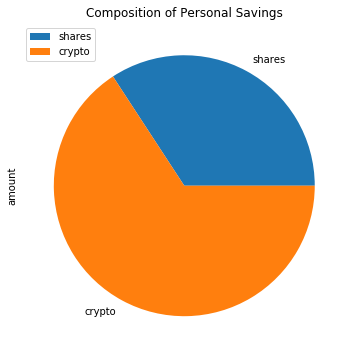

In [12]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="amount", title="Composition of Personal Savings", figsize=(6,6))

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = shares_value + crypto_value

# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have have reached your financial goal!")
else:
    short = emergency_fund -  total_savings
    print(f"You are ${round(short, 2)} away from reaching your financial goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-03-19', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-03-19', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open    high      low   close   volume     open   
2017-03-30 00:00:00-04:00  108.52  108.58  108.380  108.41  1611863  235.490   
2017-03-31 00:00:00-04:00  108.44  108.53  108.420  108.52  3151075  235.905   
2017-04-03 00:00:00-04:00  108.31  108.68  108.300  108.67  3857775  235.800   
2017-04-04 00:00:00-04:00  108.61  108.65  108.520  108.56  1482935  235.000   
2017-04-05 00:00:00-04:00  108.48  108.74  108.453  108.69  1900282  236.260   

                                                              
                             high      low   close    volume  
2017-03-30 00:00:00-04:00  236.52  235.270  236.27  40604487  
2017-03-31 00:00:00-04:00  236.51  235.680  235.71  47583793  
2017-04-03 00:00:00-04:00  236.03  233.910  235.37  58627715  
2017-04-04 00:00:00-04:00  235.58  234.555  235.51  43130784  
2017-04-05 00:00:00-04:00  237.39  234.540  234.77  84819899

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
num_sims = 1000

MC_Returns = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.40, 0.60],
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_Returns.portfolio_data.head()

AGG                                    \
                             open    high      low   close   volume   
2017-03-30 00:00:00-04:00  108.52  108.58  108.380  108.41  1611863   
2017-03-31 00:00:00-04:00  108.44  108.53  108.420  108.52  3151075   
2017-04-03 00:00:00-04:00  108.31  108.68  108.300  108.67  3857775   
2017-04-04 00:00:00-04:00  108.61  108.65  108.520  108.56  1482935   
2017-04-05 00:00:00-04:00  108.48  108.74  108.453  108.69  1900282   

                                            SPY                           \
                          daily_return     open    high      low   close   
2017-03-30 00:00:00-04:00          NaN  235.490  236.52  235.270  236.27   
2017-03-31 00:00:00-04:00     0.001015  235.905  236.51  235.680  235.71   
2017-04-03 00:00:00-04:00     0.001382  235.800  236.03  233.910  235.37   
2017-04-04 00:00:00-04:00    -0.001012  235.000  235.58  234.555  235.51   
2017-04-05 00:00:00-04:00     0.001197  236.260  237.39  234.540  234.77   

                                                  
                             volume daily_return  
2017-03-30 00:00:00-04:00  40604487          NaN  
2017-03-31 00:00:00-04:00  47583793    -0.002370  
2017-04-03 00:00:00-04:00  58627715    -0.001442  
2017-04-04 00:00:00-04:00  43130784     0.000595  
2017-04-05 00:00:00-04:00  84819899    -0.003142

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_Returns.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994012,0.991665,0.994822,1.002625,0.992432,1.003034,1.017211,0.996773,0.998880,0.999755,...,0.999181,1.001136,0.998181,1.003284,1.008585,0.989570,1.006049,1.007887,1.001493,0.993515
2,0.972352,1.001860,1.005177,1.015520,0.995436,1.003323,1.012934,1.007753,0.997073,0.988077,...,0.988959,1.007024,1.001807,0.994200,0.992802,0.992605,0.999977,1.005691,0.996915,0.991609
3,0.966121,0.990984,1.005163,1.015482,0.994225,1.011865,1.004121,1.002459,1.010640,0.988740,...,1.003095,1.006719,1.006713,0.998977,0.986878,0.991760,1.014064,1.014901,0.996483,0.989637
4,0.965101,0.984471,0.994797,1.020107,0.990061,1.005705,0.996204,1.006650,1.006391,0.995684,...,1.004493,1.003906,1.000702,0.998769,0.996615,0.990556,1.030473,1.022016,0.990195,0.992559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,20.618627,22.916125,10.925166,9.584940,16.696491,15.770939,24.610085,23.055690,6.804705,4.380120,...,10.953080,7.605375,15.210900,36.436927,21.809752,29.227637,6.182683,10.757333,47.743147,3.919449
7557,20.821373,22.938699,11.089462,9.695942,16.635337,15.602253,24.555586,23.016915,6.763474,4.332303,...,10.890424,7.524228,15.076696,36.254736,22.021768,28.924884,6.258605,10.750909,48.034616,3.883624
7558,20.631633,22.798037,11.202923,9.809744,16.704337,15.471019,24.785536,22.892127,6.874005,4.378115,...,10.848370,7.568192,15.050477,36.692980,21.763193,28.992661,6.257401,10.607261,47.699468,3.844097
7559,20.843139,22.843659,11.315154,9.871430,16.830286,15.680818,24.924701,23.034850,6.819898,4.404262,...,10.805261,7.568068,15.025285,36.781727,21.843409,28.887408,6.243305,10.488133,47.252293,3.884836


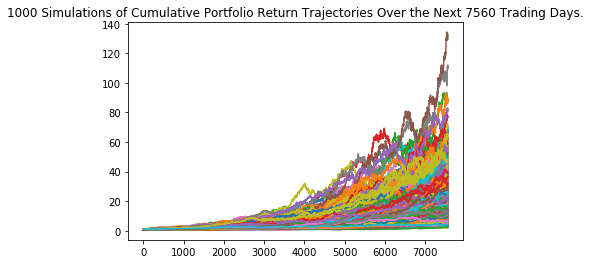

In [19]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_Returns.plot_simulation()

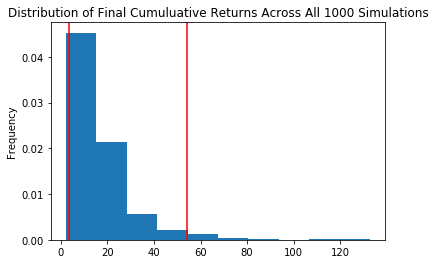

In [20]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_Returns.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
ret_tbl = MC_Returns.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(ret_tbl)

count           1000.000000
mean              16.673617
std               13.415269
min                2.096954
25%                8.480842
50%               12.576915
75%               20.329697
max              132.826240
95% CI Lower       3.524617
95% CI Upper      54.302711
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(ret_tbl['95% CI Lower'] * initial_investment, 2)
ci_upper = round(ret_tbl['95% CI Upper'] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $70492.34 and $1086054.22


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(ret_tbl['95% CI Lower'] * initial_investment, 2)
ci_upper = round(ret_tbl['95% CI Upper'] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $105738.51 and $1629081.34


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
num_sims = 1000

MC_five_year_Returns = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.30, 0.70],
    num_simulation = num_sims,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five_year_Returns.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005151,0.989934,1.012431,0.989352,0.999123,0.996684,1.003349,0.994535,1.017361,0.992880,...,0.997982,1.009807,0.980562,0.989977,0.995068,1.016782,0.991996,1.003100,0.999628,0.990935
2,0.977270,0.996625,0.986501,0.993067,1.001761,1.003854,0.995562,1.005505,1.026903,0.999879,...,0.994300,1.005605,0.997613,0.980924,1.001788,1.019556,1.002410,1.011657,1.004883,0.991706
3,0.987415,1.002457,0.979165,0.986706,0.992032,1.005743,0.986343,1.020182,1.014750,0.998289,...,1.006212,1.006382,0.993899,0.975501,1.015658,1.017542,1.009261,1.016865,1.002335,0.978442
4,0.977493,0.989168,0.984042,1.002677,0.998520,1.011562,0.981704,1.010664,0.998142,0.990902,...,1.013354,0.997604,0.991079,0.986347,1.016003,1.026919,0.997237,1.020765,1.008171,0.972806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.851676,1.218543,1.012669,1.139934,1.581289,1.663903,2.431086,3.412987,1.477074,1.142322,...,1.680764,1.800142,1.611808,1.081505,1.811219,1.283676,1.974356,1.126408,0.975066,0.964970
1257,0.857295,1.218972,1.007209,1.136264,1.602764,1.673480,2.441258,3.403118,1.487097,1.154335,...,1.677308,1.813277,1.599804,1.092227,1.786683,1.281716,1.961507,1.122448,0.981951,0.950106
1258,0.867200,1.223409,1.012994,1.138414,1.599708,1.690532,2.457895,3.413398,1.473250,1.160580,...,1.691238,1.844953,1.604394,1.077310,1.795620,1.268904,1.971763,1.103414,0.997939,0.944009
1259,0.876404,1.229744,1.006661,1.140948,1.599754,1.672286,2.479192,3.388397,1.488808,1.170536,...,1.697055,1.844415,1.595201,1.090065,1.827645,1.273530,1.952119,1.114821,0.994295,0.951470


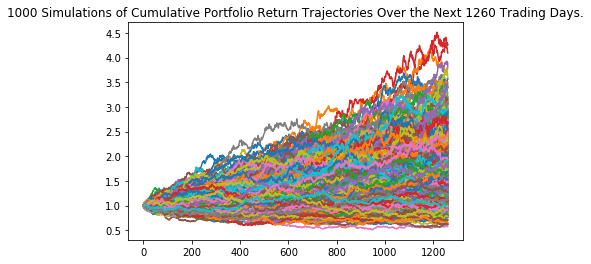

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_five_year_Returns.plot_simulation()

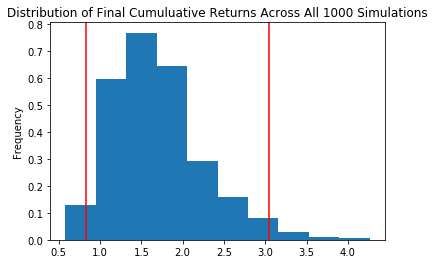

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_five_year_Returns.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
five_year_ret_tbl = MC_five_year_Returns.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(five_year_ret_tbl)

count           1000.000000
mean               1.689727
std                0.557092
min                0.579459
25%                1.288970
50%                1.606297
75%                1.974750
max                4.264689
95% CI Lower       0.828431
95% CI Upper       3.043587
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(five_year_ret_tbl['95% CI Lower'] * initial_investment, 2)
ci_upper_five = round(five_year_ret_tbl['95% CI Upper'] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $49705.84 and $182615.23


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
num_sims = 1000

MC_ten_year_Returns = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.65, 0.35],
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_year_Returns.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004136,0.992588,0.998788,0.996949,0.993048,1.004650,1.000820,0.996817,0.992741,0.998949,...,1.000995,1.006909,0.991060,1.000356,1.003882,0.995573,1.002173,0.996597,0.989308,0.995586
2,1.005153,0.994628,1.010165,1.004905,0.992257,1.008038,1.003065,0.995915,0.987255,0.997809,...,1.005181,1.005378,0.994772,1.005734,1.010534,1.009904,1.003420,1.005316,0.982554,0.993033
3,1.008815,1.003204,1.008063,1.006168,1.000728,1.008325,1.002333,0.996836,0.991442,1.000627,...,1.008910,1.003086,0.992407,1.001430,1.006573,1.005747,0.997822,1.007609,0.983461,0.997566
4,1.004915,1.010970,1.006034,1.009020,1.001855,1.004252,0.993116,0.984095,0.991384,1.002810,...,1.005643,1.010500,0.983861,1.001299,1.005017,1.008578,1.006133,1.008919,0.983506,0.999026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.496153,1.678608,2.243274,1.394662,2.422257,1.739958,1.502448,1.600354,2.016727,1.676217,...,1.483018,2.623891,2.323254,1.493208,1.298288,1.779030,2.475571,2.182107,2.156296,1.396689
2517,1.492904,1.698220,2.246536,1.394166,2.413340,1.733307,1.493925,1.614317,2.012109,1.687012,...,1.475354,2.630806,2.344979,1.489205,1.308500,1.782533,2.489262,2.172343,2.165116,1.396209
2518,1.481921,1.703014,2.256914,1.393952,2.420286,1.731540,1.481597,1.610305,2.028268,1.689958,...,1.472415,2.637113,2.342229,1.481615,1.302820,1.765115,2.498049,2.189762,2.176525,1.391765
2519,1.471760,1.690937,2.263252,1.397094,2.424021,1.728428,1.478543,1.607003,2.043585,1.709764,...,1.467893,2.633133,2.345527,1.484551,1.290025,1.768678,2.525132,2.207163,2.167583,1.395967


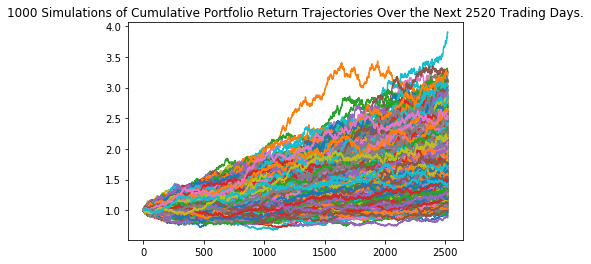

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_ten_year_Returns.plot_simulation()

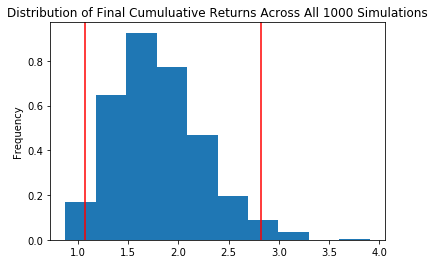

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_ten_year_Returns.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
ten_year_ret_tbl = MC_ten_year_Returns.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
ten_year_ret_tbl

count           1000.000000
mean               1.805511
std                0.437716
min                0.877341
25%                1.486219
50%                1.754423
75%                2.071306
max                3.903589
95% CI Lower       1.075049
95% CI Upper       2.824547
Name: 2520, dtype: float64

In [35]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(five_year_ret_tbl['95% CI Lower'] * initial_investment, 2)
ci_upper_ten = round(five_year_ret_tbl['95% CI Upper'] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $49705.84 and $182615.23
